# FrozenLake Q-Table Learning

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the environment

In [2]:
env = gym.make('FrozenLake-v0')
# env = gym.make('FrozenLake8x8-v0')

[2017-07-08 14:26:58,092] Making new env: FrozenLake-v0


In [3]:
print(env.observation_space.n)

16


In [4]:
print(env.action_space.n)

4


### Implement Q-Table learning algorithm

In [5]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set learning parameters
learn_rate = .8
gamma = .99
num_episodes = 10000

#create lists to contain total rewards and steps per episode
report_episodes = 1000
step_report = []
win_report = []
step_list = []
reward_list = []

for i in range(num_episodes):
    #Reset environment and get first new observation
    state = env.reset()
    reward_per_episode = 0
    step_count = 0
    done = False
    #The Q-Table learning algorithm
    while True:
        step_count += 1
        #Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) * (1. / (i+1)))
        #Get new state and reward from environment
        next_state, reward, done, _ = env.step(action)
        #Update Q-Table with new knowledge
        Q[state, action] = Q[state, action] + learn_rate * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        reward_per_episode += reward
        state = next_state
        if done == True:
            break
    step_list.append(step_count)
    reward_list.append(reward_per_episode)

    if (i+1)%report_episodes == 0:
        avg_step = np.mean(step_list)
        win_ratio = np.sum(reward_list) / report_episodes
        step_report.append(avg_step)
        win_report.append(win_ratio)
        step_list = []
        reward_list = []
        print("{}/{} Average Step: {} Winning Ratio: {} %".format(i+1, num_episodes, avg_step, win_ratio))


1000/10000 Average Step: 45.831 Winning Ratio: 0.27 %
2000/10000 Average Step: 66.403 Winning Ratio: 0.429 %
3000/10000 Average Step: 68.234 Winning Ratio: 0.392 %
4000/10000 Average Step: 64.633 Winning Ratio: 0.418 %
5000/10000 Average Step: 66.36 Winning Ratio: 0.418 %
6000/10000 Average Step: 65.374 Winning Ratio: 0.432 %
7000/10000 Average Step: 67.702 Winning Ratio: 0.424 %
8000/10000 Average Step: 66.792 Winning Ratio: 0.423 %
9000/10000 Average Step: 65.867 Winning Ratio: 0.443 %
10000/10000 Average Step: 68.123 Winning Ratio: 0.419 %


In [6]:
print("Final Q-Table")
print(Q)

Final Q-Table
[[  7.30951700e-03   4.26961158e-03   2.61361880e-01   1.21882220e-02]
 [  2.17753499e-03   1.64124800e-04   1.19490503e-03   1.60092847e-01]
 [  1.05391397e-02   3.25031894e-03   3.29140546e-03   1.34381920e-01]
 [  7.99650750e-04   8.38661087e-04   0.00000000e+00   1.25053392e-01]
 [  2.90293640e-01   0.00000000e+00   1.01903778e-03   5.93034449e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  6.42180305e-05   1.19398606e-05   2.10031155e-01   3.20681236e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.25999909e-05   5.16806485e-03   2.67821264e-04   5.93044035e-01]
 [  0.00000000e+00   7.44186960e-01   2.04224553e-03   0.00000000e+00]
 [  2.27994127e-01   5.13405921e-04   3.21557931e-04   8.58437218e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.47954301e-03   1.38133486e-03   8.93794367e-01   5.563940

In [7]:
print("0:LEFT, 1:DOWN, 2:RIGHT, 3:UP")
print(np.argmax(Q, axis=1).reshape(-1,env.action_space.n))

0:LEFT, 1:DOWN, 2:RIGHT, 3:UP
[[2 3 3 3]
 [0 0 2 0]
 [3 1 0 0]
 [0 2 3 0]]


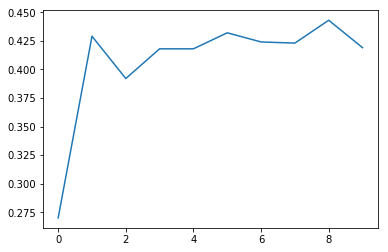

In [8]:
plt.plot(win_report)

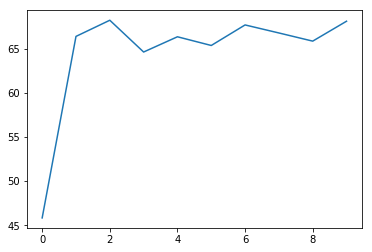

In [9]:
plt.plot(step_report)